# Home Credit Default Risk 
In the practice case this time I will work on a classification project from the Home Credit Default Risk data, to predict whether new applicants will be able to pay back or not. I will apply the CRISP-DM methodology, starting with:
1. Business understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation (if the evaluation of the model is still not good we can go back to the previous stage)
6. Deployment (in this case we did not get deployment)

![picture](https://drive.google.com/uc?id=1j2mqqyhLgIM08EZY5C3_qdgOWM1qNTSg)


### Load Data and get basic information

### Loaad Data and Get Some Basic Info

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df_test = pd.read_csv('/content/drive/My Drive/Home Credit data/application_test.csv') #application_test
df_train = pd.read_csv('/content/drive/My Drive/Home Credit data/application_train.csv') #applicantion_train
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
print('data train terdiri dari {} kolom dan {} baris'.format(df_train.shape[1],df_train.shape[0]))
print('data test terdiri dari {} kolom dan {} baris'.format(df_train.shape[1],df_train.shape[0]))

data train terdiri dari 122 kolom dan 307511 baris
data test terdiri dari 122 kolom dan 307511 baris


### Handling with missing values

In [208]:
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [209]:
df_train.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [0]:
#copy df
df = df_train

In [0]:
def Check_missing_value(df):
  total = df.isnull().sum()
  percentage = 100*total/len(df)
  table = pd.concat([total,percentage],axis=1)
  mis_table = table.rename(columns = {0:'Missing Values', 1:'Percentage'})
  missing_table =mis_table[mis_table.iloc[:,1]!=0].sort_values('Percentage',ascending=False).round(1)
  return missing_table

In [212]:
Table_MisVal = Check_missing_value(df)
print('the number of columns for df_train that have missing values : {}'.format(Table_MisVal.shape[0]))

the number of columns for df_train that have missing values : 67


In [213]:
Table_MisVal.tail(20)

,Missing Values,Percentage
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5


In [214]:
ZT = Table_MisVal[Table_MisVal['Percentage']> 30.0] #Zero Tolerance
ZT.shape

(50, 2)

In [215]:
ZT

,Missing Values,Percentage
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [216]:
#drop columns with missing values more than 35
i = 0
count_of_columns_removed = 0
columns_removed = []


for i in df.columns:
  percent_NA = 100*(df[i].isnull().sum()/len(df.index))
  if percent_NA >= 35.0:
    columns_removed.append(i)
    df = df.drop(columns=i)
    count_of_columns_removed +=1

print(columns_removed)
print(' number of columns which have been removed :', count_of_columns_removed )

for i in columns_removed:
  df_test = df_test.drop(columns=i)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [217]:
#checking number of columns, the columns from train and test have to be same
print('Number of columns from df_train :', df.shape[1])
print('Number of columns from df_test :', df_test.shape[1])

Number of columns from df_train : 73
Number of columns from df_test : 72


In [218]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

In [219]:
new_mis = Check_missing_value(df)
new_mis

,Missing Values,Percentage
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [0]:
#handling with missing values
num_col = ['EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR',
           'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY',
           'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

cat_col =['OCCUPATION_TYPE', 'NAME_TYPE_SUITE']

for i in num_col:
  df[i] = df[i].fillna((df[i].median()))
  df_test[i] = df_test[i].fillna((df_test[i].median()))
for i in cat_col:
  df[i] = df[i].fillna(df[i].mode()[0])
  df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [221]:
no_NA = Check_missing_value(df)
no_NA

,Missing Values,Percentage


In [222]:
no_NA_test = Check_missing_value(df_test)
no_NA_test

,Missing Values,Percentage


### Encode Data types

In [223]:
df.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

In [224]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [0]:
# we use labelencoder for the columns that just have 2 categoies and use onehotencoding which have more than 2
from sklearn.preprocessing import LabelEncoder

In [226]:
le = LabelEncoder()
le_count = 0

for i in df:
  if df[i].dtype == 'object':
    if len(list(df[i].unique())) <= 2:
      le.fit(df[i])
      df[i] = le.transform(df[i])
      df_test[i] = le.transform(df_test[i])
      le_count += 1

print('%d columns were label encoded' %le_count)


3 columns were label encoded


In [0]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [228]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [229]:
print('training shape :', df.shape)
print('testing shape :', df_test.shape)

training shape : (307511, 182)
testing shape : (48744, 178)


There are differences in the number of columns, because there are features in the data train but not in the test data. We have to equalize the columns in training and tests, by only taking columns that have the same category in the train data and test data.

In [230]:
label = df['TARGET']

df, df_test = df.align(df_test, join = 'inner', axis=1)

df['TARGET'] = label

print('training shape :', df.shape)
print('testing shape :', df_test.shape)

training shape : (307511, 179)
testing shape : (48744, 178)


## Exploratory Data Analysis

check the distribution of the target column

In [231]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

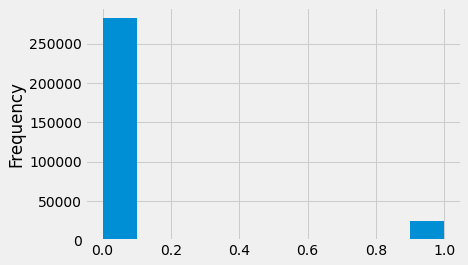

In [232]:
df['TARGET'].astype(int).plot.hist()

from this information we can see that there is an imbalance of data, where the data of people who managed to pay (value target = 0) far more than those who failed to pay (value target = 1)

### Look for Correlation

In [233]:
correlations = df.corr()['TARGET'].sort_values()

print('MOst Positive Correlations : \n', correlations.tail(20))
print('MOst Negative Correlations : \n', correlations.head(20))

MOst Positive Correlations : 
 ORGANIZATION_TYPE_Self-employed                      0.029139
NAME_HOUSING_TYPE_With parents                       0.029966
OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031401
DEF_30_CNT_SOCIAL_CIRCLE                             0.032394
LIVE_CITY_NOT_WORK_CITY                              0.032518
DAYS_REGISTRATION                                    0.041975
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working               

from here we see that the 'DAYS_BIRTH' column is the column that has the most positive correlation to target = 1 (default), while the 'EXT_SOURCE_2' column is the most negatively correlated to target = 1.

In [234]:
#checking for columns
df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

column are negative because they are recorded relative to the current loan application.And this is also the reason why there is a positive correlation between 'DAYS_BIRTH' with target = 1, let's check what if we change the age to years. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [235]:
(df['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

from here it can only be seen more clearly how the age describe. Let's check how the correlation is now with target = 1.

In [236]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].corr(df['TARGET'])

-0.07823930830982694

now the correlation becomes negative, this indicates that the older the person can pay well

Text(0, 0.5, 'Count')

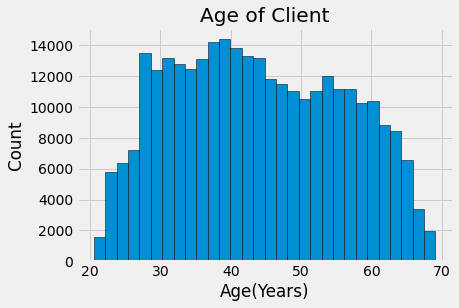

In [237]:
plt.style.use('fivethirtyeight')

plt.hist(df['DAYS_BIRTH']/365, edgecolor = 'black', bins = 30)
plt.title('Age of Client')
plt.xlabel('Age(Years)')
plt.ylabel('Count')

From here actually not really seen how the correlation between columns. For that we need to use the Kernel Density Estimation (KDE) plot. it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

Text(0, 0.5, 'Density')

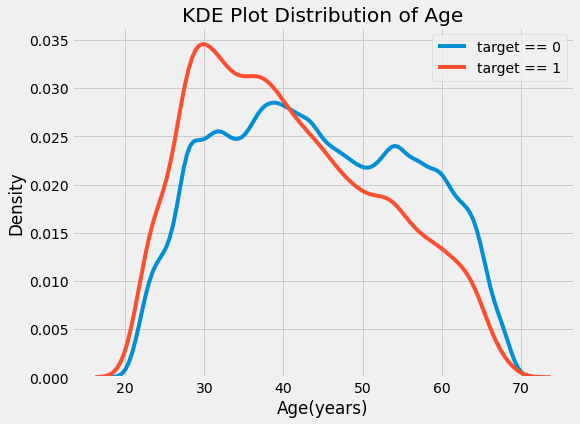

In [238]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.loc[df['TARGET']==0,'DAYS_BIRTH']/365, label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET']==1,'DAYS_BIRTH']/365, label = 'target == 1')
plt.title('KDE Plot Distribution of Age')
plt.xlabel('Age(years)')
plt.ylabel('Density')

From the KDE plot above, it can be seen that the curve with target == 1 (default) skews to the left or tends to the younger ones. To be able to see it in a different way, we can do a grouping at a certain age range (binning).

In [239]:
d_age = df[['TARGET','DAYS_BIRTH']]
d_age['YEARS_BIRTH'] = d_age['DAYS_BIRTH']/365

#binning
d_age['YEARS_BINNED'] = pd.cut(d_age['YEARS_BIRTH'], bins = np.linspace(20,70, num=11))
d_age.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [240]:
#Group and calculate the average
g_age = d_age.groupby('YEARS_BINNED').mean()
g_age

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0, 0.5, 'Failure to Repay (%)')

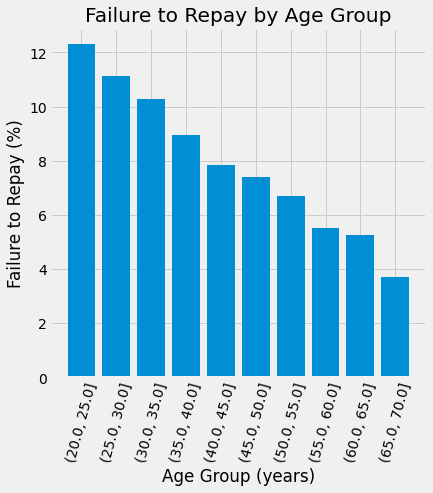

In [241]:
plt.figure(figsize=(6,6))
plt.bar(g_age.index.astype(str), 100*g_age['TARGET'])
plt.xticks(rotation=75)
plt.title('Failure to Repay by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')

With this curve we can clearly see that the younger, the more likely to default. We have gained insight from the 'DAYS_BIRTH' column as one of the columns that has a high correlation with 'TARGET'. Now it's time to see how the 'EXT_SOURCE' correlation is the column that has the biggest negative correlation.


In [242]:
d_EXT = df[['TARGET','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
corr_ext = d_EXT.corr()
corr_ext

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.160295,-0.155892,-0.078239
EXT_SOURCE_2,-0.160295,1.000000,0.094147,0.091947
EXT_SOURCE_3,-0.155892,0.094147,1.000000,0.178527
DAYS_BIRTH,-0.078239,0.091947,0.178527,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

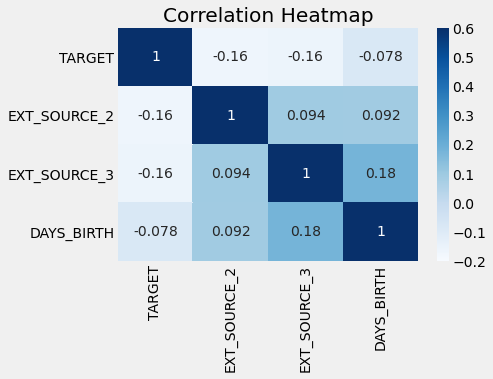

In [243]:
plt.figure(figsize=(6,4))

sns.heatmap(corr_ext, vmin=-0.20, vmax= 0.60,cmap ='Blues', annot=True)
plt.title('Correlation Heatmap')

we see a negative correlation of all columns (ext_source_2, ext_source_3, and DAYS_BIRTH) to 'TARGET', which indicates the more the value of the column increases, the more likely that person can pay back. And we see correlations between columns other than targets being positively correlated.

DATA PREPARATION (FOR MODEL BASELINE)

In [244]:
from sklearn.preprocessing import MinMaxScaler

if 'TARGET' in df:
  train = df.drop(columns=['TARGET'])
else:
  train = df.copy()

test = df_test.copy()

features = list(train.columns)

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data Shape : ', train.shape)
print('Testing data shape :', test.shape)

Training data Shape :  (307511, 178)
Testing data shape : (48744, 178)


### TRAINING MODEL (Baseline)
in this project I use two classification methods namely logistic regression and random forest, because in my opinion both of these models are quite good at doing binary classification with multiple variables

Logistic Regression

In [245]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 0.0001) # C = Regularization Parameter, which control the amount of overfitting(lower value should decrease overfitting)

#train
log_reg.fit(train, label)

LogisticRegression(C=0.0001)

After the model is trained, we will now make predictions using test data. We will use predict.proba, to predict the likelihood of someone not paying a loan. We choose the second column, because the second column is likely the target is worth 1.

In [0]:
logreg_predict = log_reg.predict_proba(test)[:,1]

Now we create a dataframe that contains 2 columns namely SK_ID_CURR and Target (prediction results).
The 'Target' column contains a probability between 0 and 1 (the loan will be returned or not). Then we store this data in a virtual environment, which can be downloaded when we run the entire notebook with the hit the blue commit & run button at the upper right of the kernel.

In [247]:
result_logreg_base = df_test[['SK_ID_CURR']]
result_logreg_base['TARGET'] = logreg_predict
result_logreg_base.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.083773
1,100005,0.134326
2,100013,0.079405
3,100028,0.092202
4,100038,0.129172


In [0]:
#save to csv
result_logreg_base.to_csv('logreg_baseline.csv',index=False)

Random Forest Classifier

In [249]:

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 42, verbose =1, n_jobs = -1)

#train
RF.fit(train, label)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [250]:
#making predictions
RF_predict = RF.predict_proba(test)[:,1]

#make result dataframe
result_randomforest_baseline = df_test[['SK_ID_CURR']]
result_randomforest_baseline['TARGET'] = RF_predict

#save file
result_randomforest_baseline.to_csv('random_forest_baseline.csv', index=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [251]:
#extract feature importance
feature_imp_val = RF.feature_importances_
#make dataframe
feature_impt = pd.DataFrame({'feature': features,'importance': feature_imp_val})

feature_impt.head(10)

,feature,importance
0,SK_ID_CURR,0.043250
1,NAME_CONTRACT_TYPE,0.002342
2,FLAG_OWN_CAR,0.006617
3,FLAG_OWN_REALTY,0.007477
4,CNT_CHILDREN,0.009877
5,AMT_INCOME_TOTAL,0.034861
6,AMT_CREDIT,0.038913
7,AMT_ANNUITY,0.041568
8,AMT_GOODS_PRICE,0.033632
9,REGION_POPULATION_RELATIVE,0.034686


### Analysis Feature Importance and Doing Feature Selection

From previous EDA we have found that the 'DAYS_BIRTH' and 'EXT_SOURCE' columns have a strong correlation to the target, now we see and compare them with the results of the selection of important features of the random forest

In [0]:
feature_impt.columns = feature_impt.columns.str.strip()

In [0]:
feature_impt.sort_values(by='importance', ascending=False,inplace=True)

In [254]:
feature_impt.head(20)

,feature,importance
30,EXT_SOURCE_2,0.063889
31,EXT_SOURCE_3,0.059097
10,DAYS_BIRTH,0.045866
13,DAYS_ID_PUBLISH,0.045212
12,DAYS_REGISTRATION,0.044577
0,SK_ID_CURR,0.043250
7,AMT_ANNUITY,0.041568
36,DAYS_LAST_PHONE_CHANGE,0.040247
11,DAYS_EMPLOYED,0.039373
6,AMT_CREDIT,0.038913


according to our analysis on EDA that the feature or column ['DAYS_BIRTH', 'EXT_SOURCE'] has a strong influence on the target.
Henceforth we can just make a feature selection for modeling by selecting features that are considered important here.

In [0]:
feature_importance = list(feature_impt.iloc[0:16,0])

In [256]:
feature_importance

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_30_CNT_SOCIAL_CIRCLE']

Modeling with Feature Selected

In [0]:
train_2 = df[feature_importance]
test_2 = df_test[feature_importance]

In [258]:
#logistic regression
log_reg2 = LogisticRegression(C = 0.0001)
log_reg2.fit(train_2,label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.0001)

In [0]:
log_reg2_predict = log_reg2.predict_proba(test_2)[:,1]

In [260]:
result_logreg = df_test[['SK_ID_CURR']]
result_logreg['TARGET'] = log_reg2_predict
result_logreg.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.779860
1,100005,0.751897
2,100013,0.744647
3,100028,0.302388
4,100038,0.487477


In [0]:
#save 
result_logreg.to_csv('Result Logistic Regression.csv', index=False)

In [262]:
#RandomForest
RF2 = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, n_jobs=-1)
RF2.fit(train_2,label)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [263]:
RF2_predict = RF2.predict_proba(test_2)[:,1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.9s finished


In [264]:
result_randomForest = df_test[['SK_ID_CURR']]
result_randomForest['TARGET'] = RF2_predict
result_randomForest.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,100001,0.27
1,100005,0.28
2,100013,0.13
3,100028,0.12
4,100038,0.30


In [0]:
#save
result_randomForest.to_csv('Result Random Forest.csv', index=False)